# Random Forest Classifier ile Kalp Hastalığı

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
print("İlk 5 satır:")
print(df.head())

İlk 5 satır:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [4]:
print(f"Veri boyutu: {df.shape}")

Veri boyutu: (1025, 14)


In [5]:
print(f"Sütun bilgileri: {df.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
Sütun bilgileri: None


In [6]:
# Hedef değişken dağılımı (target: 0=sağlıklı, 1=hastalık var)
print(f"Hedef dağılımı: {df['target'].value_counts()}")

Hedef dağılımı: target
1    526
0    499
Name: count, dtype: int64


In [7]:
print("Veri seti özellikleri:")
print(f"En genç hasta: {df['age'].min()} yaş")
print(f"En yaşlı hasta: {df['age'].max()} yaş")
print(f"Ortalama yaş: {df['age'].mean():.1f} yaş")

Veri seti özellikleri:
En genç hasta: 29 yaş
En yaşlı hasta: 77 yaş
Ortalama yaş: 54.4 yaş


In [8]:
# Özellikler ve hedef değişken ayırma
X = df.drop('target', axis=1)  # Tüm sütunlar target hariç
y = df['target']                # Sadece target sütunu

In [9]:
# Eğitim ve test setlerine ayırma 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [10]:
print(f"Eğitim seti boyutu: {X_train.shape}")
print(f"Test seti boyutu: {X_test.shape}")

Eğitim seti boyutu: (820, 13)
Test seti boyutu: (205, 13)


In [11]:
#RANDOM FOREST MODELİ OLUŞTUR
rf_model = RandomForestClassifier(
    n_estimators=100,      # 100 karar ağacı
    random_state=42,
    max_depth=10,          # Ağaç derinliği---overfitting önlemek için
    min_samples_split=5    # Bir düğümü bölmek için min örnek sayısı
)


In [12]:
#Modeli eğit
rf_model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,10
,min_samples_split,5
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [13]:
#Modeli test et
y_pred = rf_model.predict(X_test)

In [14]:
#Model Performansı
accuracy = accuracy_score(y_test, y_pred)
print(f"MODEL DOĞRULUĞU: {accuracy:.2%}")


MODEL DOĞRULUĞU: 98.54%


In [15]:
print(classification_report(y_test, y_pred, 
                          target_names=['Sağlıklı', 'Hasta']))

              precision    recall  f1-score   support

    Sağlıklı       0.97      1.00      0.99       102
       Hasta       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



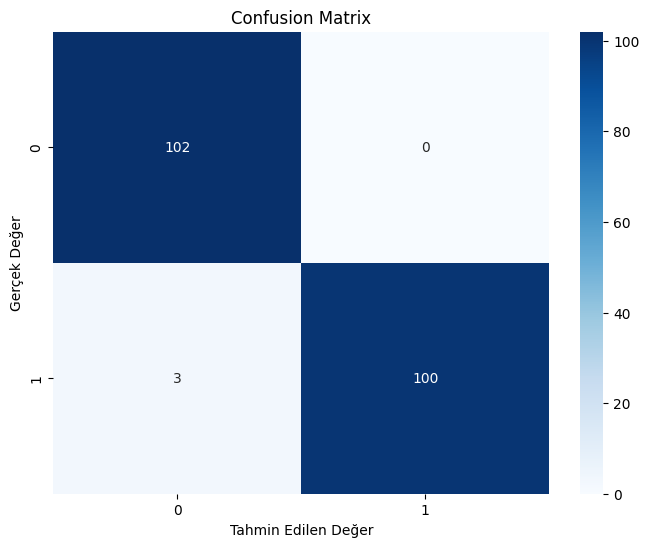

In [16]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Gerçek Değer')
plt.xlabel('Tahmin Edilen Değer')
plt.show()